# Shivam Mishra (ft32_058)


# Predicting Diabetes Risk Using Machine Learning

## Objective
The goal of this assignment is to apply machine learning techniques for predicting the risk of diabetes in individuals based on various health indicators. You will also evaluate the performance of your model using different evaluation metrics to ensure its reliability and effectiveness.

## Dataset
This assignment will use the **Pima Indians Diabetes Database**, which comprises diagnostic measurements related to diabetes among Pima Indian women. Features include the number of pregnancies, BMI, insulin level, age, and others.

## Tasks
You will go through the following tasks:
1. Data Preparation
2. Feature Engineering
3. Model Training
4. Model Evaluation

Ensure to follow the detailed steps provided under each task and fill in the code in the empty code cells.



## Dataset Details
The Pima Indians Diabetes Database includes the following features:
- **Pregnancies**: Number of times pregnant
- **Glucose**: Plasma glucose concentration over 2 hours in an oral glucose tolerance test
- **BloodPressure**: Diastolic blood pressure (mm Hg)
- **SkinThickness**: Triceps skinfold thickness (mm)
- **Insulin**: 2-Hour serum insulin (mu U/ml)
- **BMI**: Body mass index (weight in kg/(height in m)^2)
- **DiabetesPedigreeFunction**: Diabetes pedigree function (a function which scores likelihood of diabetes based on family history)
- **Age**: Age (years)
- **Outcome**: Class variable (0 or 1) 268 of 768 are 1, the others are 0

Please explore the dataset further with exploratory data analysis.


### Task 1: Data Preparation

1. Load the dataset using pandas.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import opendatasets as od
import seaborn as sns



In [2]:
od.download("https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database")

Skipping, found downloaded files in ".\pima-indians-diabetes-database" (use force=True to force download)


In [3]:
df=pd.read_csv(r"C:\Users\assis\Downloads\MASAI DBMS\Google colab file\COLAB_File\pima-indians-diabetes-database\diabetes.csv")

In [4]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


2. Perform a brief exploratory data analysis (EDA) to understand the dataset's characteristics.

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


C:\ProgramData\anaconda3\envs\Jupyter notebook\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

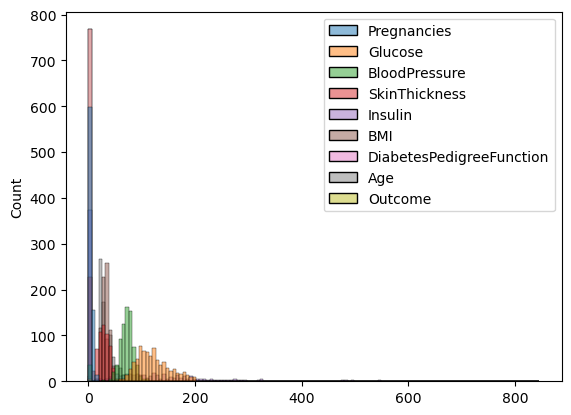

In [6]:
sns.histplot(df)

In [7]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

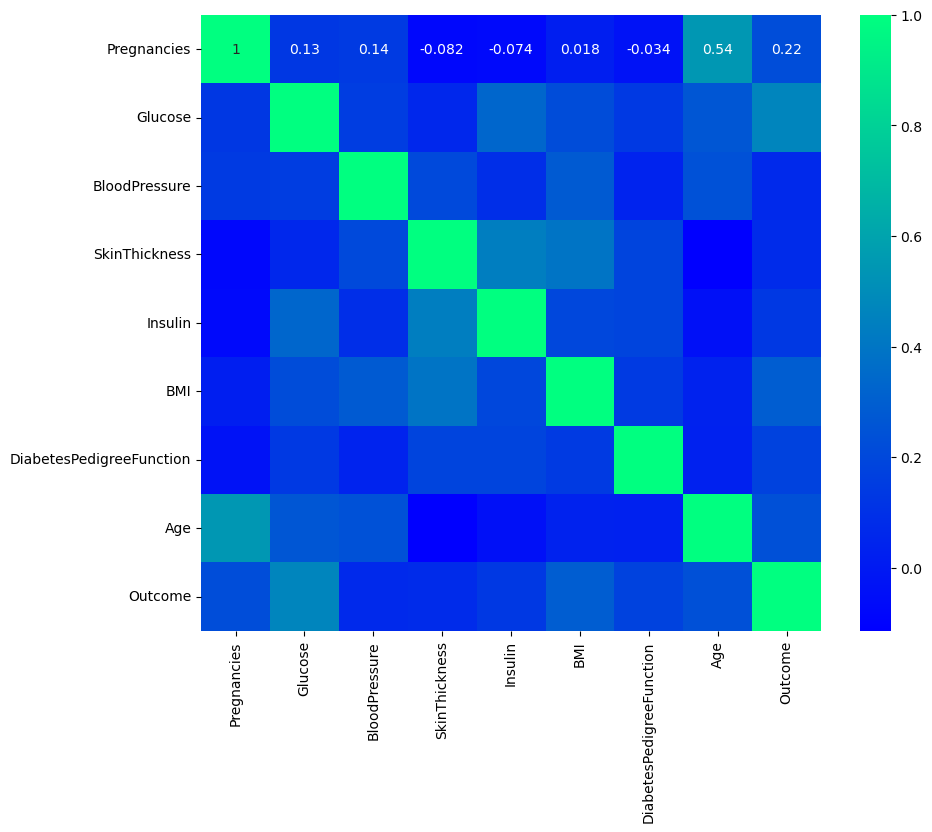

In [54]:
corr_matrix = df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True,cmap="winter")

In [ ]:
sns.pairplot(df,hue='Outcome')

<Axes: >

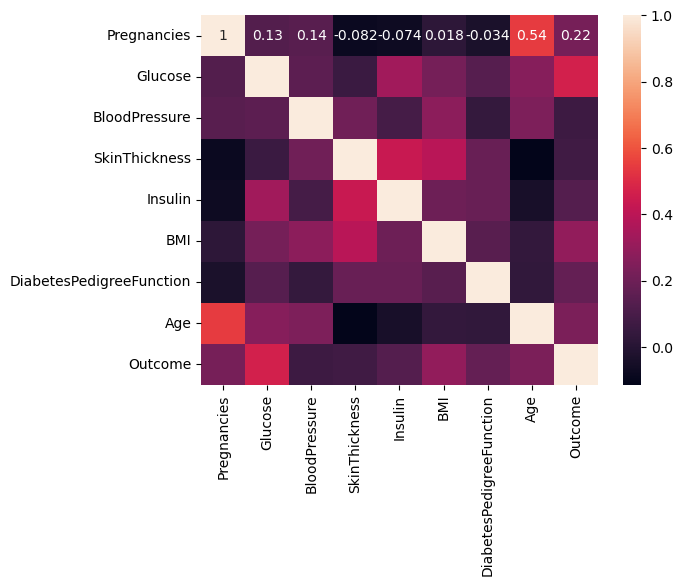

In [8]:
sns.heatmap(df.corr(),annot=True)

3. Split the dataset into training (60%), validation (20%), and testing (20%) sets.

In [9]:
from sklearn.model_selection import train_test_split
train_val_df,test_df=train_test_split(df,test_size=0.4,random_state=42)
train_df,val_df=train_test_split(train_val_df,test_size=0.2,random_state=42)
print("train_df",train_df.shape)
print("val_df",val_df.shape)
print("test_df",test_df.shape)

train_df (368, 9)
val_df (92, 9)
test_df (308, 9)


In [10]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [18]:
inputs=list(train_df.columns[:-1])
inputs

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [19]:
target='Outcome'

In [20]:
train_input=train_df[inputs]
train_target=train_df[target]
val_input=val_df[inputs]
val_target=val_df[target]
test_input=test_df[inputs]
test_target=test_df[target]

### Task 2: Feature Engineering

1. Identify numerical and categorical features.

In [21]:
numeric=df.select_dtypes(include=np.number).columns.tolist()
numeric
numeric=numeric[:-1]


In [22]:
categorical=df.select_dtypes(object).columns.tolist()
categorical

[]

2. Standardize numerical features using `StandardScaler`.

In [23]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(train_input[numeric])
x=scaler.transform(train_input[numeric])
x

array([[ 0.43523281,  0.4955476 , -0.36135667, ..., -0.46054371,
        -0.21597627, -0.5934806 ],
       [-1.13501889, -0.48095316, -0.59506362, ..., -0.75587535,
        -0.97877529, -0.8439403 ],
       [-1.13501889, -0.05373408, -0.2445032 , ...,  0.30463371,
        -0.7867036 , -0.00907463],
       ...,
       [-1.13501889, -0.29785927,  0.57347113, ..., -0.13836375,
         1.05444081, -1.01091343],
       [ 1.69143416,  0.00729722, -0.01079625, ...,  0.14354372,
        -0.31749988,  0.57533134],
       [-0.82096855, -0.23682797, -0.01079625, ...,  0.3449062 ,
         0.10780173, -0.09256119]])

In [24]:
train_input.head(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
71,5,139,64,35,140,28.6,0.411,26


3. Encode categorical features using `OneHotEncoder`, if any.

In [25]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(sparse=False,handle_unknown='ignore')
encoder.fit(df[categorical])
encoded_cols=list(encoder.get_feature_names_out(categorical))


C:\ProgramData\anaconda3\envs\Jupyter notebook\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


4. Apply these transformations to the training, validation, and testing datasets.

In [26]:
train_input[encoded_cols]=encoder.transform(train_input[categorical])
val_input[encoded_cols]=encoder.transform(val_input[categorical])
test_input[encoded_cols]=encoder.transform(test_input[categorical])

### Task 3: Model Training

1. Train a logistic regression model on the training dataset.

In [30]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(train_input[numeric],train_target)

LogisticRegression()

2. Provide a rationale for choosing logistic regression.

In [31]:
print(model.intercept_)

[-9.11918522]


In [32]:
print(model.coef_)

[[ 0.05037991  0.03147095 -0.01112222  0.00315944 -0.00077356  0.1220559
   0.09587273  0.03460358]]


In [33]:
numeric

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

### Task 4: Model Evaluation

1. Evaluate the model on the validation set using Accuracy, Precision, Recall, F1 Score, and AUC-ROC.

In [43]:
train=train_input[numeric+encoded_cols]
val=val_input[numeric+encoded_cols]
test=test_input[numeric+encoded_cols]

test_pred=model.predict(test)
train_pred=model.predict(train)


In [44]:
from sklearn.metrics import accuracy_score
accuracy_score(train_target,train_pred)

0.7581521739130435

In [45]:
from sklearn.metrics import accuracy_score
accuracy_score(test_target,test_pred)

0.75

In [53]:
train_target.value_counts()

Outcome
0    231
1    137
Name: count, dtype: int64

Accuracy represents the proportion of correctly classified instances. While it's a common metric, it may not be the most informative in the presence of imbalanced datasets.

In [46]:
from sklearn.metrics import precision_score
test_pred


array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,

In [47]:
test_target

668    0
324    0
624    0
690    0
473    0
      ..
367    0
446    0
589    0
342    0
453    0
Name: Outcome, Length: 308, dtype: int64

In [48]:

precision_score(test_target,test_pred)

0.6213592233009708

In [49]:
precision_score(train_target,train_pred)

0.7068965517241379

Precision is the ratio of true positive predictions to the total positive predictions made by the model. In the context of diabetes prediction, precision reflects the ability of the model to correctly identify individuals with diabetes. A lower precision means there is a higher chance of false positives

In [40]:
from sklearn.metrics import recall_score
recall_score(test_target,test_pred)

0.6274509803921569

In [50]:
recall_score(train_target,train_pred)

0.5985401459854015

Recall measures the ratio of true positive predictions to the total actual positive instances. In diabetes prediction, recall indicates how well the model captures individuals with diabetes. A lower recall suggests that the model may miss some cases of diabetes.

In [41]:
from sklearn.metrics import f1_score
f1_score(test_pred,test_target)

0.624390243902439

In [51]:
f1_score(train_target,train_pred)

0.6482213438735179

The F1 score is the harmonic mean of precision and recall, providing a balance between the two metrics. A lower F1 score suggests that there is room for improvement in balancing precision and recall.

2. Generate a confusion matrix for the validation set predictions.

In [42]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_target,test_pred)

array([[167,  39],
       [ 38,  64]], dtype=int64)

- True Positives (TP): 64
- True Negatives (TN): 167
- False Positives (FP): 39
- False Negatives (FN): 38

In [52]:
confusion_matrix(train_target,train_pred)

array([[197,  34],
       [ 55,  82]], dtype=int64)

3. Discuss the implications of each metric in the context of diabetes prediction.

- Accuracy represents the proportion of correctly classified instances. While it's a common metric, it may not be the most informative in the presence of imbalanced datasets.

- Precision is the ratio of true positive predictions to the total positive predictions made by the model. In the context of diabetes prediction, precision reflects the ability of the model to correctly identify individuals with diabetes. A lower precision means there is a higher chance of false positives

- Recall measures the ratio of true positive predictions to the total actual positive instances. In diabetes prediction, recall indicates how well the model captures individuals with diabetes. A lower recall suggests that the model may miss some cases of diabetes.

- The F1 score is the harmonic mean of precision and recall, providing a balance between the two metrics. A lower F1 score suggests that there is room for improvement in balancing precision and recall.

-